Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Loading the data
df= pd.read_csv('insurance_data.csv')

Data Exploration

In [22]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [23]:
df.shape

(1340, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


PatientID data type int (should be an object) and Age is float (should be int)

In [25]:
#Changing data types of PatientID and age
df['PatientID']= data['PatientID'].astype('object')
df['age']= data['age'].astype('int')

In [26]:
data= df.copy(deep=True)

#Checking for missing values
data.isna().sum()

index            0
PatientID        3
age              3
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

The number of null values for PatientID, age and region are insignificant so we drop them.

In [28]:
#Dropping Null values for PatientID, age, region
data.dropna(subset=['PatientID','age','region'], inplace=True)
data.isna().sum(0)

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [31]:
#Descriptive Statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1337.0,670.970830,386.153126,0.00,337.00,671.00,1005.00,1339.00
age,1337.0,38.086013,11.091991,18.00,29.00,38.00,47.00,60.00
bmi,1337.0,30.672924,6.112768,16.00,26.20,30.40,34.70,53.10
bloodpressure,1337.0,94.169035,11.438582,80.00,86.00,92.00,99.00,140.00
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
claim,1337.0,13279.668295,12109.827623,1121.87,4746.34,9386.16,16657.72,63770.43


In [32]:
#Descriptive statitistics for categorical variables
data.describe(include='object').T

,count,unique,top,freq
PatientID,1337,1337,1340,1
gender,1337,2,male,675
diabetic,1337,2,No,697
smoker,1337,2,No,1063
region,1337,4,southeast,443


In [30]:
#Checking for duplicates
data.duplicated().sum()

np.int64(0)

There are no duplicates in the data.

In [35]:
#Dropping irrelevant columns like PatientID and index
data1= data.copy(deep=True)
data1.drop(['PatientID', 'index'], axis=1, inplace=True)

In [36]:
#Grouping into categorical and numerical data

numerical_cols= data1.select_dtypes(include=[np.number]).columns
categorical_cols= data1.select_dtypes(exclude=[np.number]).columns

numerical_data= data1[numerical_cols]
categorical_data= data1[categorical_cols]

EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

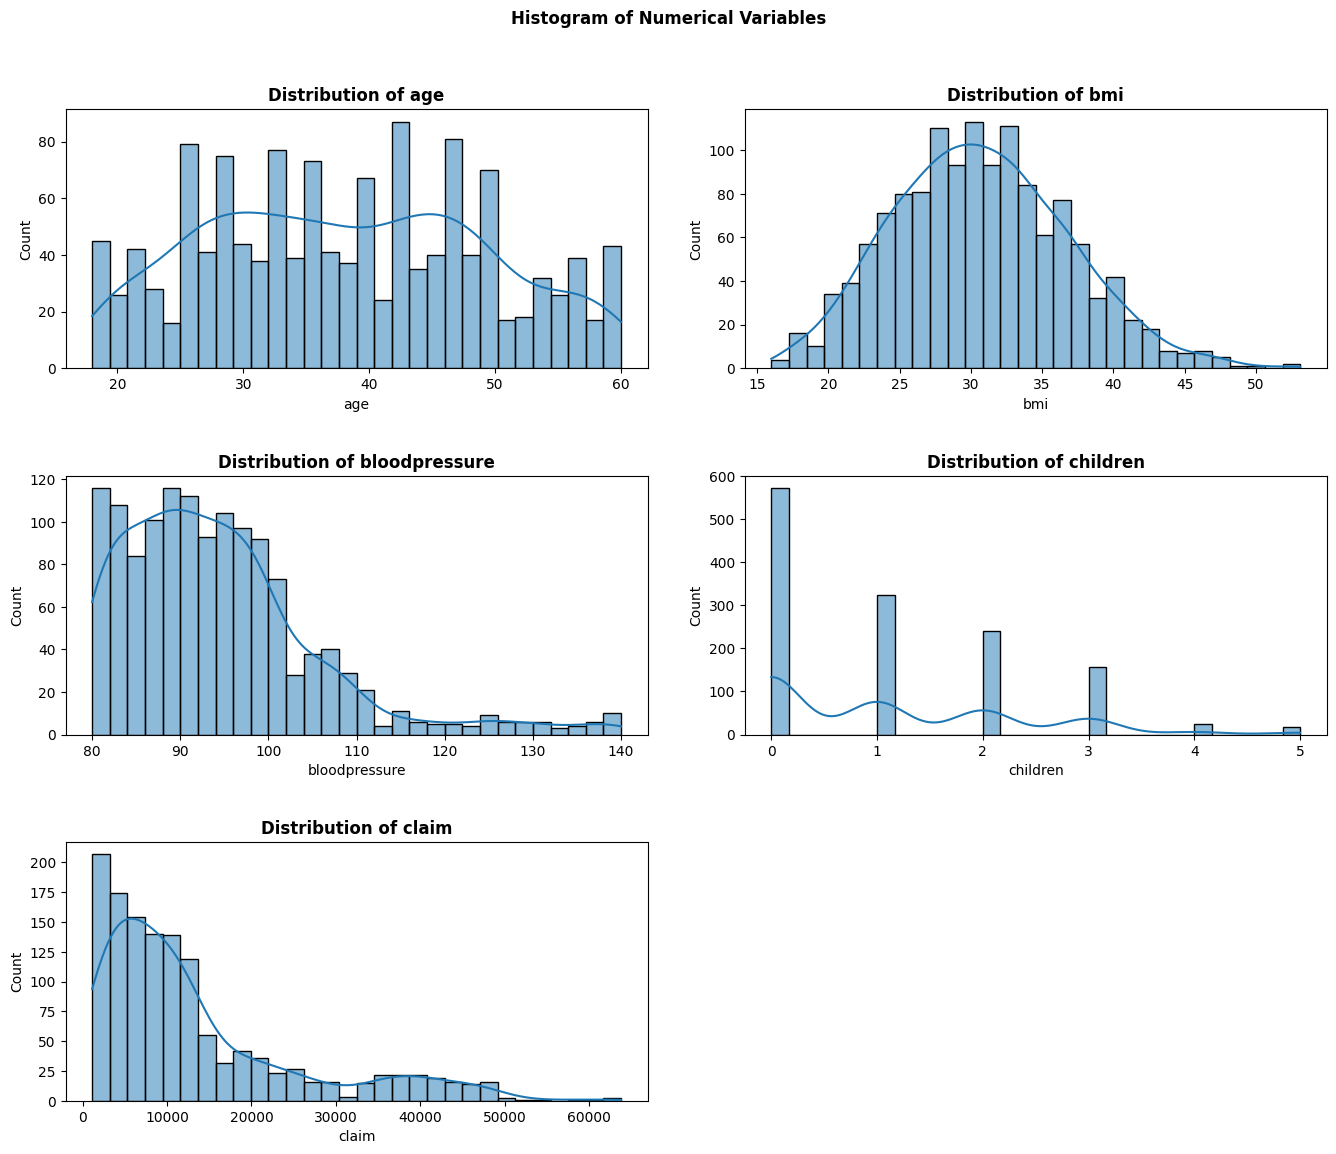

In [46]:
#Distribution plot of numerical variables

plt.figure(figsize=(14,12))
plt.suptitle("Histogram of Numerical Variables", fontweight='bold')

for i, col in enumerate(numerical_data):
    plt.subplot(3,2, i+1)
    sns.histplot(numerical_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontweight='bold')
    plt.tight_layout(pad=3)

The distribution plots show that:
1. Ages of individuals are uniformly distributed
2. bmi is normally distributed
3. bloodpressure & claims have higher positive skewness (right-skwed)
4. majority of the individuals have no children

In [55]:
#Value counts for each unique element in each column

for i, col in enumerate(categorical_data):
    print(f"{categorical_data[col].value_counts()}")

gender
male      675
female    662
Name: count, dtype: int64
diabetic
No     697
Yes    640
Name: count, dtype: int64
smoker
No     1063
Yes     274
Name: count, dtype: int64
region
southeast    443
northwest    349
southwest    314
northeast    231
Name: count, dtype: int64


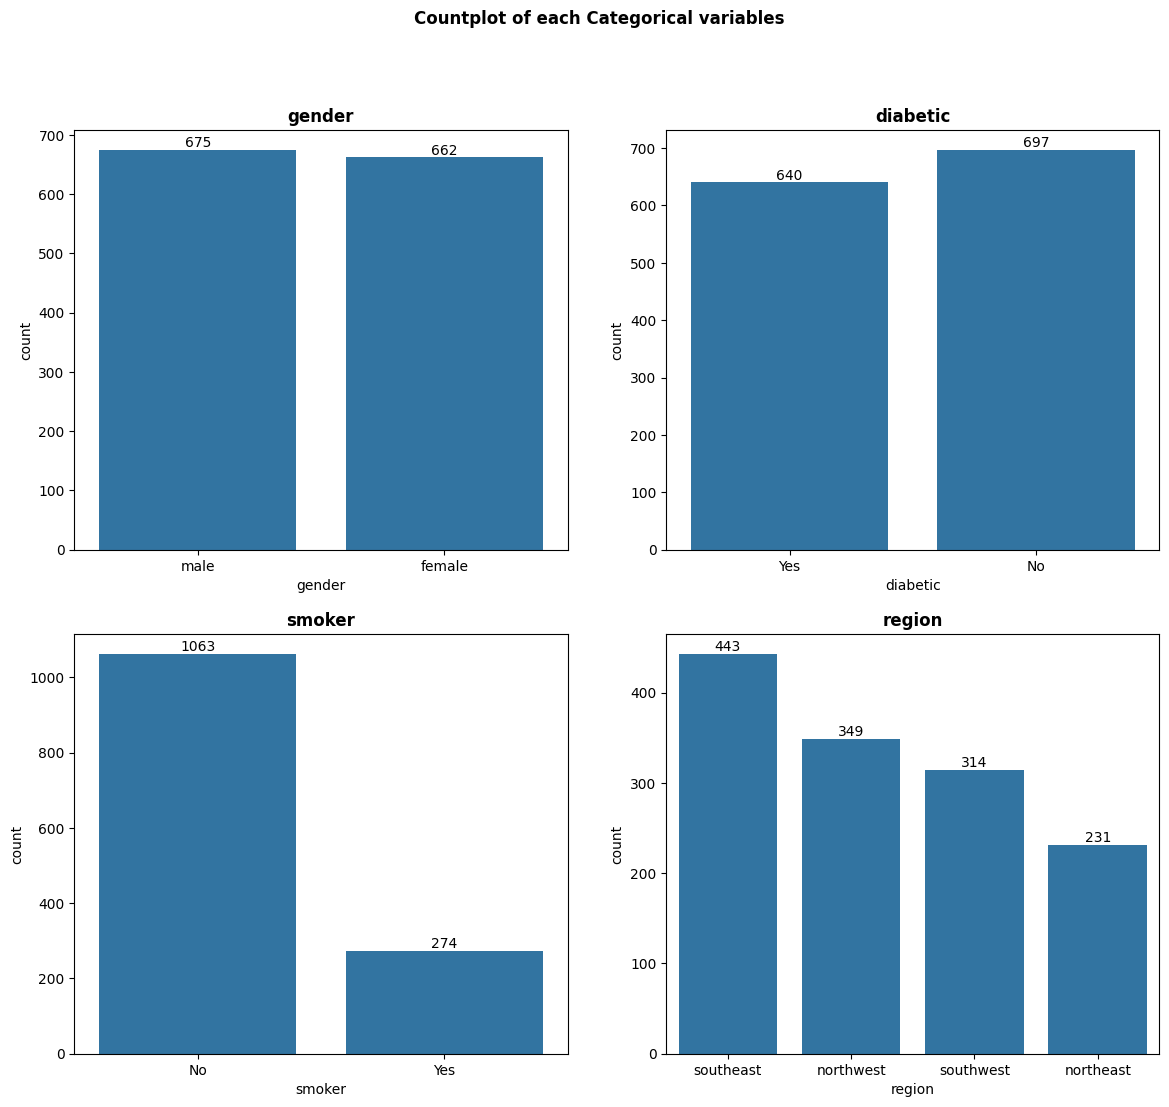

In [64]:
#Univariate analysis of categorical variables

plt.figure(figsize=(14,12))
plt.suptitle("Countplot of each Categorical variables", fontweight='bold')


for i, col in enumerate(categorical_data):
    plt.subplot(2,2,i+1)
    ax=sns.countplot(x=categorical_data[col])
    ax.bar_label(ax.containers[0])
    plt.title(f"{col}", fontweight='bold')

BIVARIATE ANALYSIS

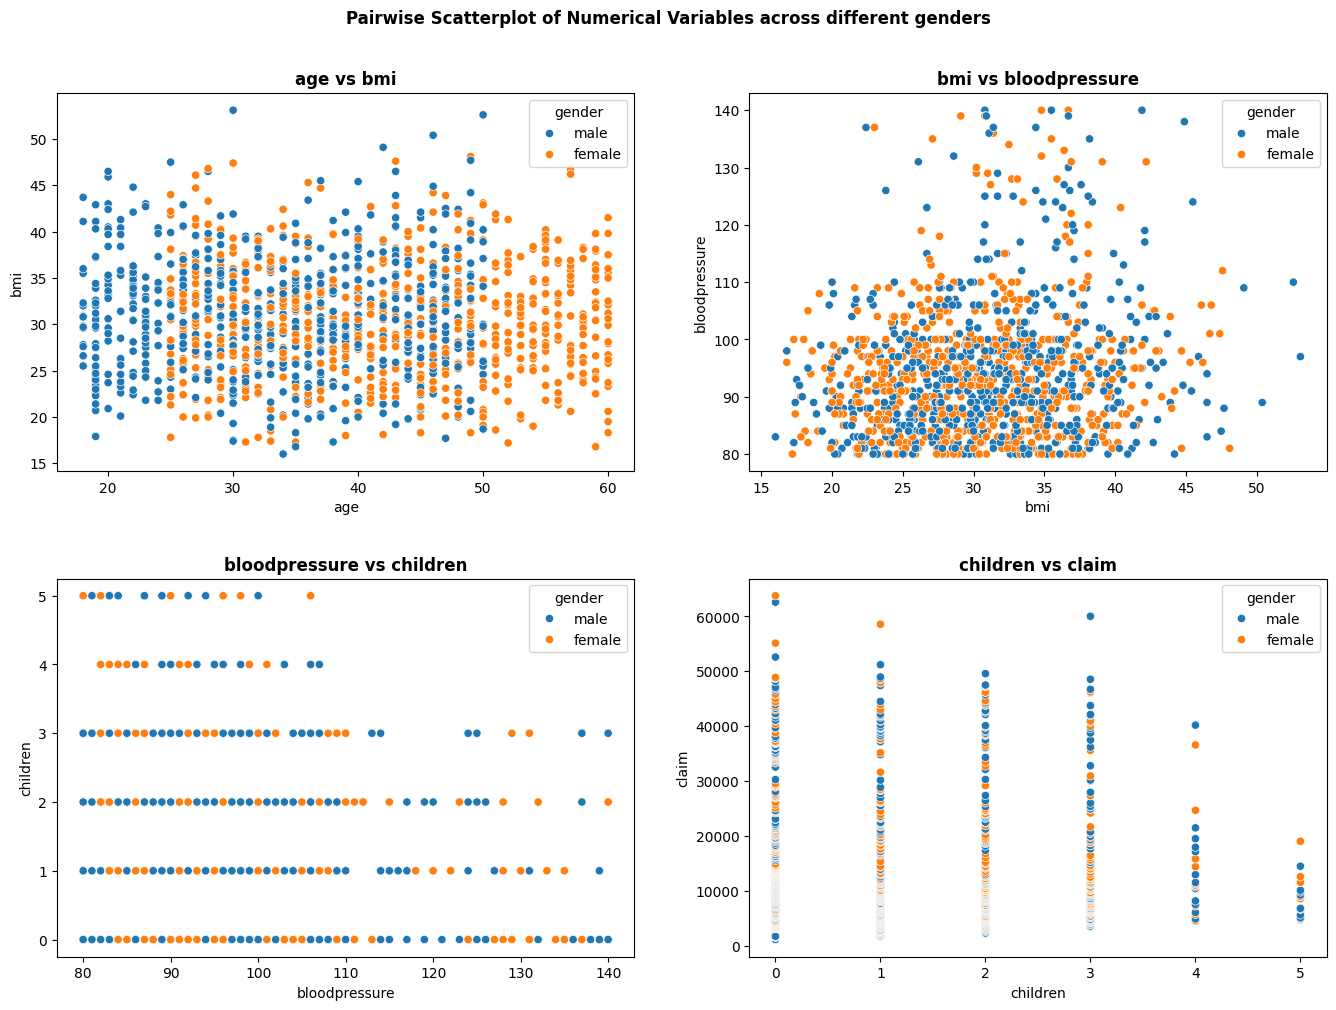

In [86]:
#Scatter plot Numerical Variables

plt.figure(figsize=(14,20))
plt.suptitle("Pairwise Scatterplot of Numerical Variables across different genders", fontweight='bold')
for i in range(0, len(numerical_cols)-1):
    plt.subplot(4,2, i+1)
    sns.scatterplot(x= numerical_data[numerical_cols[i]], y=numerical_data[numerical_cols[i+1]], hue=categorical_data['gender'])
    plt.title(f"{numerical_cols[i]} vs {numerical_cols[i+1]}", fontweight='bold')
    plt.tight_layout(pad=3)



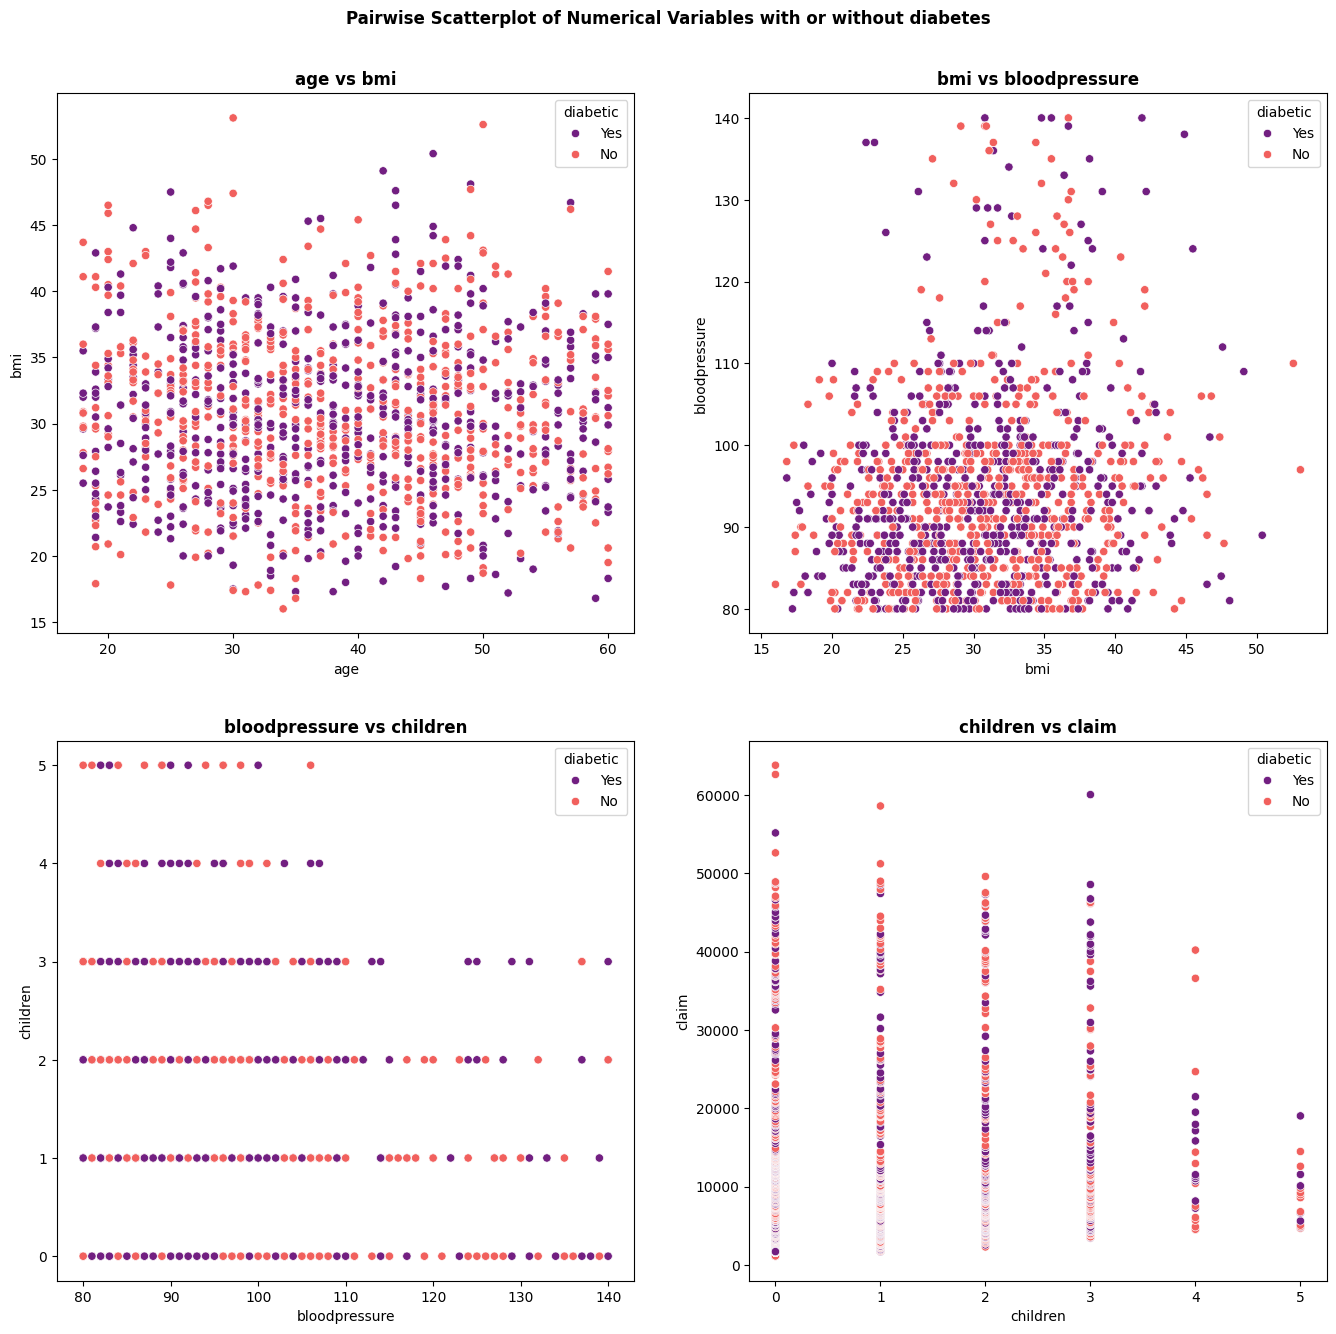

In [87]:
plt.figure(figsize=(14,20))
plt.suptitle("Pairwise Scatterplot of Numerical Variables with or without diabetes", fontweight='bold')
for i in range(0, len(numerical_cols)-1):
    plt.subplot(3,2, i+1)
    sns.scatterplot(x= numerical_data[numerical_cols[i]], y=numerical_data[numerical_cols[i+1]], hue=categorical_data['diabetic'], palette="magma")
    plt.title(f"{numerical_cols[i]} vs {numerical_cols[i+1]}", fontweight='bold')
    plt.tight_layout(pad=3)